# **CULMINATING PROJECT**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# File path
file_path = 'ABC Company.xlsx'
df = pd.read_excel(file_path)
df.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,2023-02-06 00:00:00,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,2023-06-06 00:00:00,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,2023-05-06 00:00:00,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,2023-05-06 00:00:00,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,2023-10-06 00:00:00,231,NaN,5000000.0


## **Preprocessing:**

In [ ]:
# Overview of dataset
print('Shape of the dataset:', df.shape)
df.info()
df.describe(include='all')

Shape of the dataset: (458, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      458 non-null    object 
 1   Team      458 non-null    object 
 2   Number    458 non-null    int64  
 3   Position  458 non-null    object 
 4   Age       458 non-null    int64  
 5   Height    458 non-null    object 
 6   Weight    458 non-null    int64  
 7   College   374 non-null    object 
 8   Salary    447 non-null    float64
dtypes: float64(1), int64(3), object(5)
memory usage: 32.3+ KB


,Name,Team,Number,Position,Age,Height,Weight,College,Salary
count,458,458,458.000000,458,458.000000,458,458.000000,374,4.470000e+02
unique,458,30,NaN,5,NaN,18,NaN,118,NaN
top,Priyanka,New Orleans Pelicans,NaN,SG,NaN,2023-09-06 00:00:00,NaN,Kentucky,NaN
freq,1,19,NaN,102,NaN,59,NaN,22,NaN
mean,NaN,NaN,17.713974,NaN,26.934498,NaN,221.543668,NaN,4.833970e+06
std,NaN,NaN,15.966837,NaN,4.400128,NaN,26.343200,NaN,5.226620e+06
min,NaN,NaN,0.000000,NaN,19.000000,NaN,161.000000,NaN,3.088800e+04
25%,NaN,NaN,5.000000,NaN,24.000000,NaN,200.000000,NaN,1.025210e+06
50%,NaN,NaN,13.000000,NaN,26.000000,NaN,220.000000,NaN,2.836186e+06
75%,NaN,NaN,25.000000,NaN,30.000000,NaN,240.000000,NaN,6.500000e+06


In [ ]:
# Correct the data in the "height" column by replacing it with random numbers between 150 and 180.
np.random.seed(42)
df['Height'] = np.random.randint(150, 181, size=len(df))
df[['Name', 'Team', 'Age', 'Height']].head(10)

,Name,Team,Age,Height
0,Avery Bradley,Boston Celtics,25,156
1,Jae Crowder,Boston Celtics,25,169
2,John Holland,Boston Celtics,27,178
3,R.J. Hunter,Boston Celtics,22,164
4,Jonas Jerebko,Boston Celtics,29,160
5,Amir Johnson,Boston Celtics,29,157
6,Jordan Mickey,Boston Celtics,21,178
7,Kelly Olynyk,Boston Celtics,25,170
8,Terry Rozier,Boston Celtics,22,156
9,Marcus Smart,Boston Celtics,22,175


In [ ]:
# Cleaned dataset file
cleaned_file_path = 'ABC Company_cleaned.xlsx'
df.to_excel(cleaned_file_path, index=False)
print('Cleaned dataset:', cleaned_file_path)

Cleaned dataset: ABC Company_cleaned.xlsx


## **Analysis Tasks and Graphical Representation:**

In [ ]:
# Determine the distribution of employees across each team and
# calculate the percentage split relative to the total number of employees.
team_counts = df['Team'].value_counts()
team_percent = (team_counts / len(df)) * 100
team_distribution = pd.DataFrame({'Employee_Count': team_counts,'Percentage': team_percent.round(2)})
print('The distribution of employees across each team:')
team_distribution

The distribution of employees across each team:


,Employee_Count,Percentage
Team,,
New Orleans Pelicans,19,4.15
Memphis Grizzlies,18,3.93
Utah Jazz,16,3.49
Milwaukee Bucks,16,3.49
New York Knicks,16,3.49
Boston Celtics,15,3.28
Los Angeles Clippers,15,3.28
Los Angeles Lakers,15,3.28
Phoenix Suns,15,3.28


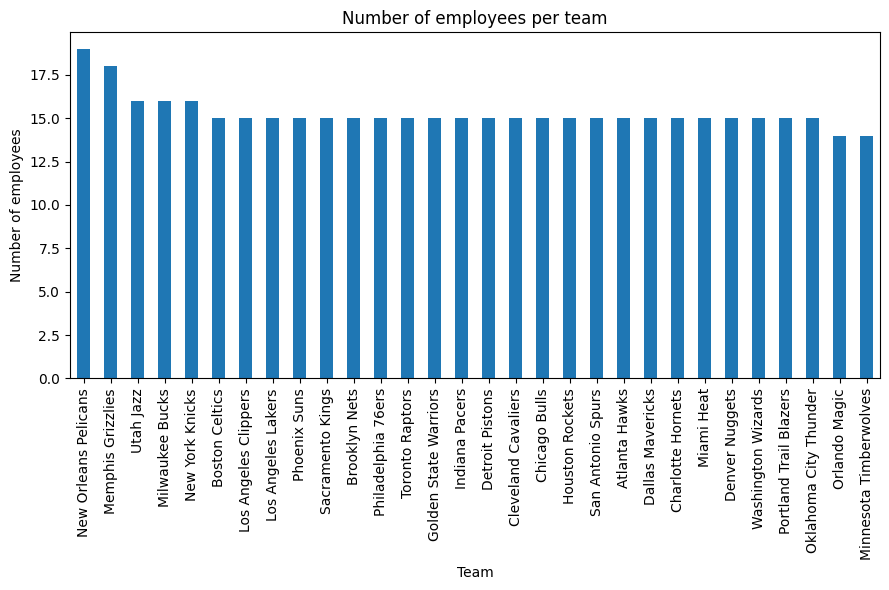

In [ ]:
# Visualization: Number of employees per team
plt.figure(figsize=(9, 6))
team_counts.plot(kind='bar')
plt.title('Number of employees per team')
plt.xlabel('Team')
plt.ylabel('Number of employees')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
# Segregate employees based on their positions within the company
position_counts = df['Position'].value_counts()
position_distribution = pd.DataFrame({'Employee_Count': position_counts})
print('Employee distribution across positions:')
position_distribution

Employee distribution across positions:


,Employee_Count
Position,
SG,102
PF,100
PG,92
SF,85
C,79


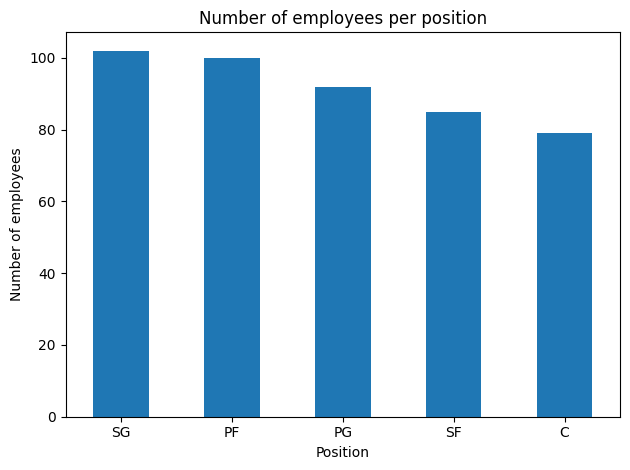

In [ ]:
# Visualization: Number of employees per position
position_counts.plot(kind='bar')
plt.title('Number of employees per position')
plt.xlabel('Position')
plt.ylabel('Number of employees')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# Identify the predominant age group among employees.
age_bins = [18, 25, 30, 35, 40, 100]
age_labels = ['18-24', '25-29', '30-34', '35-39', '40+']
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)
age_group_counts = df['Age_Group'].value_counts().sort_index()
print('Employee count by age group:')
print(age_group_counts)
predominant_age_group = age_group_counts.idxmax()
print('\nPredominant age group:', predominant_age_group)

Employee count by age group:
Age_Group
18-24    154
25-29    182
30-34     90
35-39     29
40+        3
Name: count, dtype: int64

Predominant age group: 25-29


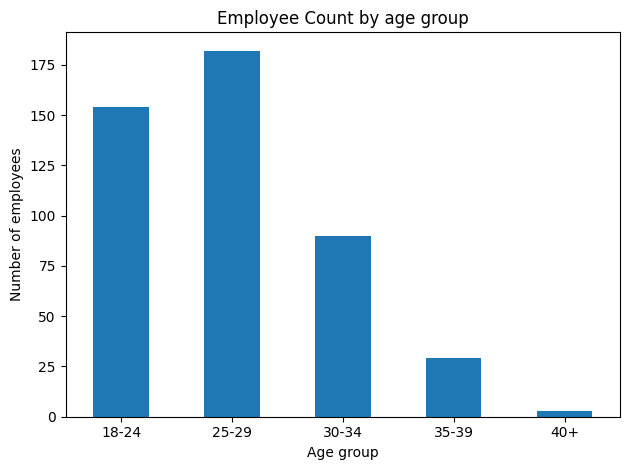

In [ ]:
# Visualization: Employee count by age group
age_group_counts.plot(kind='bar')
plt.title('Employee Count by age group')
plt.xlabel('Age group')
plt.ylabel('Number of employees')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# Salary expenditure by team
salary_by_team = df.groupby('Team')['Salary'].sum().sort_values(ascending=False)
print('Total salary expenditure by team:')
print(salary_by_team)
top_team = salary_by_team.idxmax()
top_team_amount = salary_by_team.max()
print('\nTeam with highest total salary expenditure:', top_team)
print('Amount:', top_team_amount)

# Salary expenditure by position
salary_by_position = df.groupby('Position')['Salary'].sum().sort_values(ascending=False)
print('\nTotal salary expenditure by position:')
print(salary_by_position)
top_position = salary_by_position.idxmax()
top_position_amount = salary_by_position.max()
print('\nPosition with highest total salary expenditure:', top_position)
print('Amount:', top_position_amount)

Total salary expenditure by team:
Team
Cleveland Cavaliers       106988689.0
Los Angeles Clippers       94854640.0
Oklahoma City Thunder      93765298.0
Golden State Warriors      88868997.0
Chicago Bulls              86783378.0
San Antonio Spurs          84442733.0
New Orleans Pelicans       82750774.0
Miami Heat                 82515673.0
Charlotte Hornets          78340920.0
Memphis Grizzlies          76550880.0
Washington Wizards         76328636.0
Houston Rockets            75283021.0
New York Knicks            73303898.0
Atlanta Hawks              72902950.0
Los Angeles Lakers         71770431.0
Sacramento Kings           71683666.0
Dallas Mavericks           71198732.0
Toronto Raptors            71117611.0
Milwaukee Bucks            69603517.0
Detroit Pistons            67168263.0
Indiana Pacers             66751826.0
Utah Jazz                  64007367.0
Phoenix Suns               63445135.0
Orlando Magic              60161470.0
Denver Nuggets             60121930.0
Minnesota T

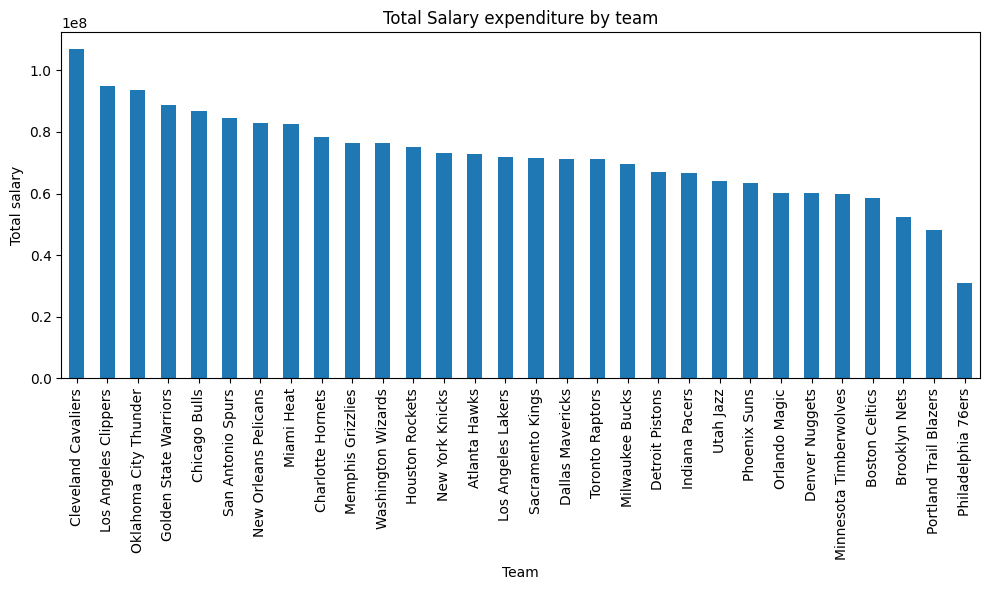

In [ ]:
# Visualization: Total salary expenditure by team
plt.figure(figsize=(10, 6))
salary_by_team.plot(kind='bar')
plt.title('Total Salary expenditure by team')
plt.xlabel('Team')
plt.ylabel('Total salary')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

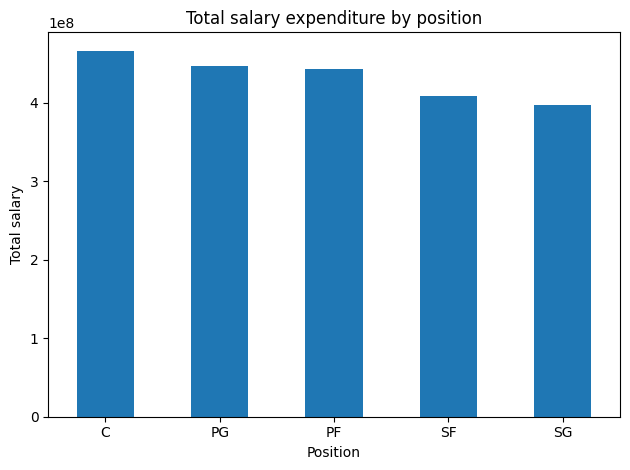

In [ ]:
# Visualization: Total salary expenditure by position
salary_by_position.plot(kind='bar')
plt.title('Total salary expenditure by position')
plt.xlabel('Position')
plt.ylabel('Total salary')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# Investigate if there's any correlation between age and salary
correlation_value = df['Age'].corr(df['Salary'])
print('Correlation between Age and Salary:', round(correlation_value, 3))

Correlation between Age and Salary: 0.214


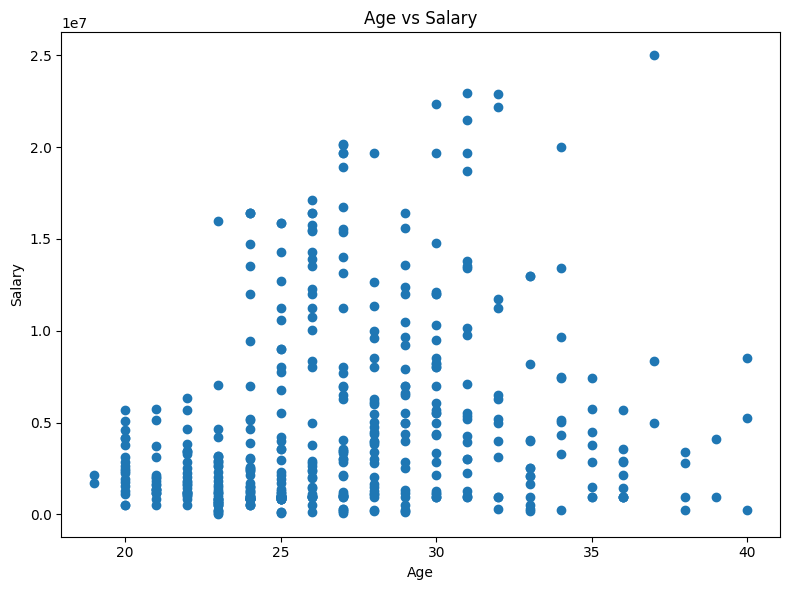

In [ ]:
# Visualization: Age vs Salary
plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['Salary'])
plt.title('Age vs Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.tight_layout()
plt.show()

In [ ]:
print("Data story:")
# Insights
print("- Most employees are grouped in a few big teams. Some teams have only a small number of people.")
print("- A few job positions appear more often, meaning the company depends mainly on those roles.")
print("- One age group has more employees than the others, so most workers are in the same age range.")
print("- Some teams and positions take a bigger share of the total salary, meaning they have higher pay or more staff.")
print("- The link between age and salary is weak, so age does not strongly change how much people earn.")

Data story:
- Most employees are grouped in a few big teams. Some teams have only a small number of people.
- A few job positions appear more often, meaning the company depends mainly on those roles.
- One age group has more employees than the others, so most workers are in the same age range.
- Some teams and positions take a bigger share of the total salary, meaning they have higher pay or more staff.
- The link between age and salary is weak, so age does not strongly change how much people earn.
